In [1]:
from utils import read_csv_data, clean_location, build_column_vocabulary, convert_to_one_hot

In [2]:
data = read_csv_data("../data/processed_job_postings.csv", ["name", "industry", "location", "formatted_experience_level"], "standardized_annual_salary")
data = clean_location(data, 2)
import random
random.seed(42)
random.shuffle(data)

train_data = data[:10000]
val_data = data[10000:11000]
test_data = data[12000:]

In [3]:
print(data[10])



(['Hallmark Cards', 'Retail', 'FL', 'Entry level'], '26000.0')


In [4]:
vocab_name = build_column_vocabulary(train_data, 0)
vocab_sector = build_column_vocabulary(train_data, 1)
vocab_state = build_column_vocabulary(train_data, 2)
vocab_level = build_column_vocabulary(train_data, 3)
len(vocab_state)

56

In [5]:
train_indices = convert_to_one_hot(train_data, [(0, vocab_name),
                                                (1, vocab_sector),
                                                (2, vocab_state),
                                                (3, vocab_level)
                                                ])
val_indices = convert_to_one_hot(val_data, [(0, vocab_name),
                                            (1, vocab_sector),
                                            (2, vocab_state),
                                            (3, vocab_level)
                                            ])

In [6]:
from mlp import MLP, train_model
total_features = len(vocab_name) + len(vocab_sector) + len(vocab_state) + len(vocab_level)
model = MLP(input_size=total_features, hidden_size=100, output_size=1)  

Iteration 50: Train Loss 155532.40539469456, Validation Loss 92134.56729310549
Iteration 100: Train Loss 147236.08233343976, Validation Loss 83435.67855531251
Iteration 150: Train Loss 132293.09965399624, Validation Loss 67927.82238480466
Iteration 200: Train Loss 118593.92413632023, Validation Loss 54887.724977812504
Iteration 250: Train Loss 107981.99893319531, Validation Loss 45559.33008640626
Iteration 300: Train Loss 104075.30366177343, Validation Loss 43095.040125859385
Iteration 350: Train Loss 102821.42072614063, Validation Loss 43179.70316921876
Iteration 400: Train Loss 102094.79612175781, Validation Loss 43024.17830789064
Iteration 450: Train Loss 101846.89119543745, Validation Loss 43942.85522351564
Iteration 500: Train Loss 101221.0699836641, Validation Loss 41985.480382578135
Iteration 550: Train Loss 100374.04045622272, Validation Loss 41357.52598953126
Iteration 600: Train Loss 100840.22569304689, Validation Loss 42789.733402031256
Iteration 650: Train Loss 99998.406892

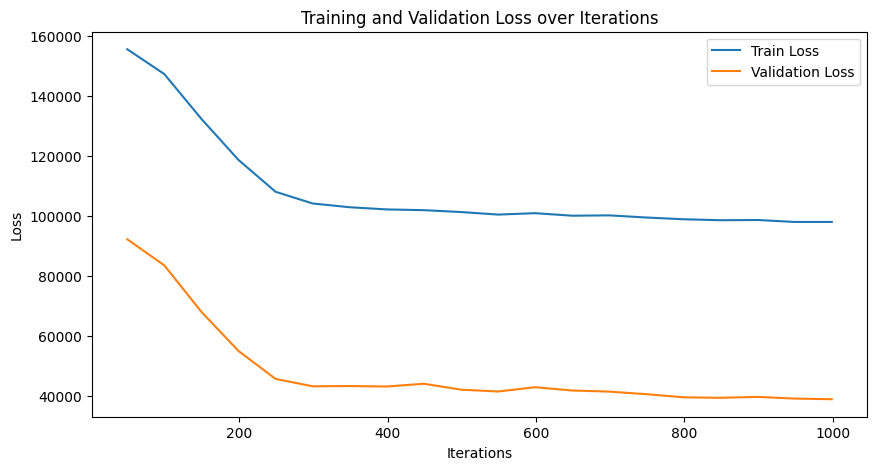

In [7]:
train_model(model, train_indices, val_indices, 0.1)